# Decoding Neuraly Relevant Information from the Shape of the Hemodynamic Response
A walk-through the three neuromimaging data sets acquired during my PhD.

This documentation is not prospective (constructed as the work unfolds) but retrospective (at a stage close to classic publication). Yes, shame on me.

I am therefore constructing this documentation backward, from the highly processed data of final figures back toward the raw data. Note that I may never get to the raw data due to time constrains, so many projects, this imperfect current system of scholarly publishing and you know, life.

## Brain Decoding of Visual Stimulus Orientation With Cyclical Stimulus Paradigm

Stimuli were presented at one of two orthogonal orientations (+/- 45 degrees) in alternating 6-sec ON and 6-sec OFF blocs. This produced sinusoidal BOLD signal variations in V1 cortex.

## Fit the sinusoidal brain response


In [14]:
addpath(genpath(fullfile(pwd,'matlabFun')))

Please get the data from the repo if not done already
data repo: C:\Users\sebas\OneDrive - McGill University\dataBig
IN: anatomical V1 roi (C-derived\DecodingHR\anat\z)
IN: preprocessed functionals (C-derived\DecodingHR\fun\x)
IN: stimulus timing (B-clean\DecodingHR\stim\160118_cyclicStim\data)
F(IN)=OUT: 2-df sinusoidal fit to single voxel time series
OUT: fit params and stats + HRF estimates (C-derived\DecodingHR\fun\y)
Not actually running because way too long



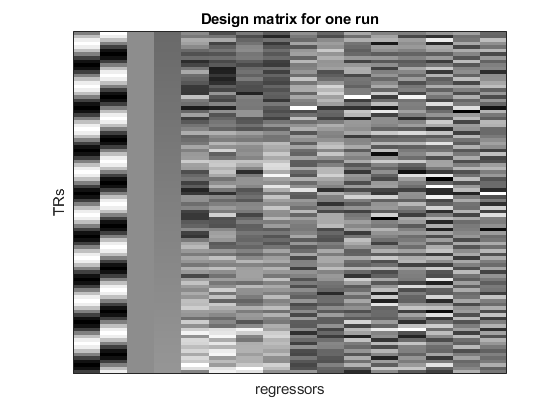

In [15]:
runFit

IN: anatomical V1 roi (C-derived\DecodingHR\anat\z)
IN: voxel visual field eccentricity (C-derived\DecodingHR\anat\z)
IN: sinusoidal fit results (C-derived\DecodingHR\fun\y)
F(IN)=OUT: masks the fit according to voxel eccentricity and activation level
OUT: sinusoidal fit results (C-derived\DecodingHR\fun\zSin)
> In imshow (line 322)
In maskSinFit (line 114)
> In imshow (line 322)
In maskSinFit (line 121)



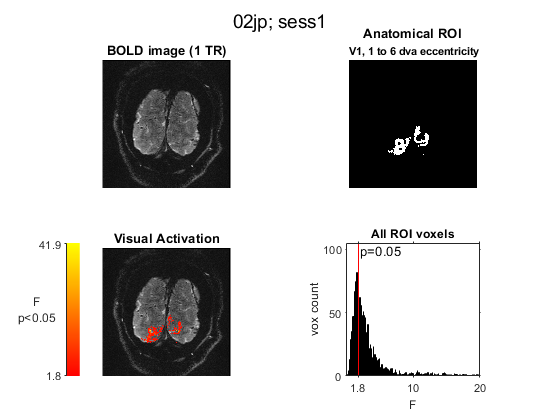

In [17]:
maskSinFit

---------------
Cartesian Space
---------------
Ori vs Plaid:
Hotelling's T^2 multivariate test
 T^2=6.04
 p=0.21
Ori1 vs Ori2:
 Hotelling's T^2 multivariate test
 T^2=1.71; p=0.56
---------------
Polar Amplitude
---------------
Ori vs Plaid:
 Student's t-test
 t=0.98; p=0.37
 Wilcoxon signed rank test
 signed rank=15.00; p=0.44
Ori1 vs Ori2:
 Student's t-test
 t=0.88; p=0.42
 Wilcoxon signed rank test
 signed rank=15.00; p=0.44
-----------
Polar Delay
-----------
Ori vs Plaid:
 Student's t-test
 t=2.97; p=0.03
 Wilcoxon signed rank test
 signed rank=20.00; p=0.06
 Hotelling's test for angular means
 F=20.00; p=0.10
Ori1 vs Ori2:
 Student's t-test
 t=0.09; p=0.94
 Wilcoxon signed rank test
 signed rank=10.00; p=1.00
 Hotelling's test for angular means
 F=10.00; p=0.33



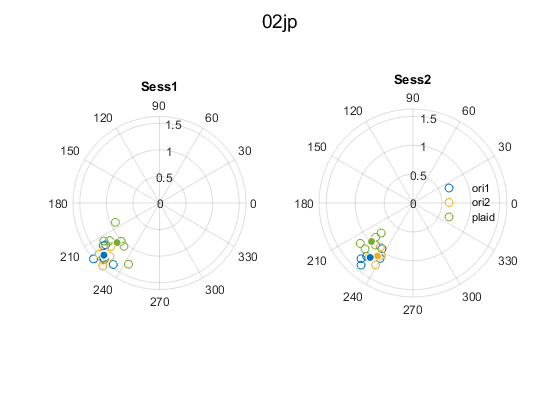

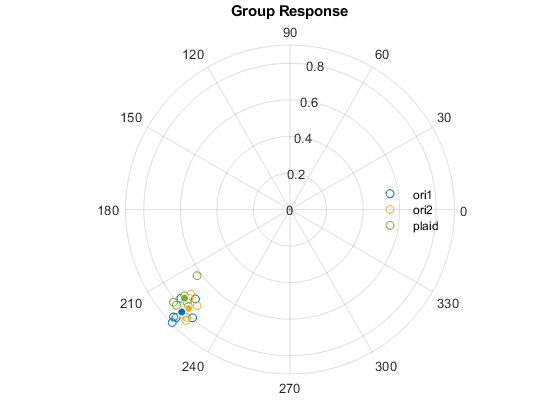

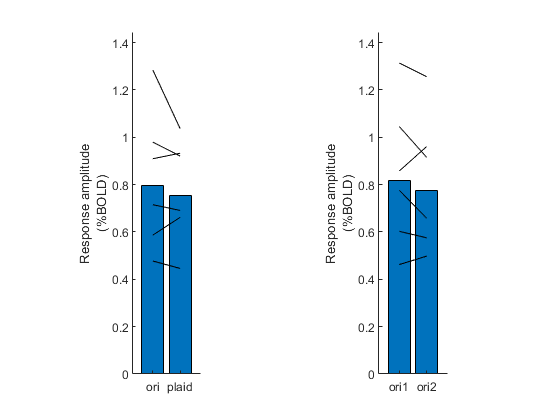

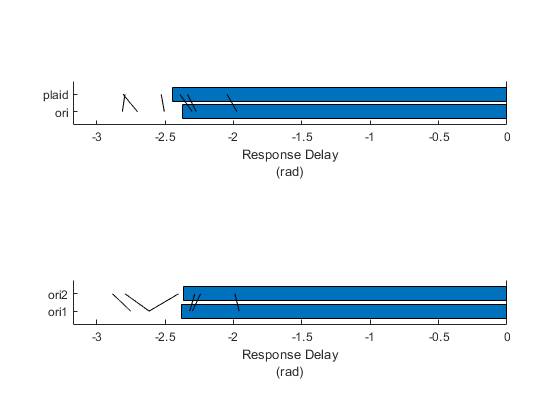

In [23]:
sinusoidalGroupAnalysis

In [1]:
dataRepo_in = 'C:\Users\sebas\OneDrive - McGill University\dataBig';
dataRepo_out = dataRepo_out;
dataDir = 'C-derived\DecodingHR';
dataLevel = 'z';
fileList = {'02jp_sess1' '03sk_sess1' '04sp_sess1' '05bm_sess1' '06sb_sess1' '07bj_sess1';...
            '02jp_sess2' '03sk_sess2' '04sp_sess2' '05bm_sess2' '06sb_sess2' '07bj_sess2'}';
fileList



fileList =

  6x2 cell array

    {'02jp_sess1'}    {'02jp_sess2'}
    {'03sk_sess1'}    {'03sk_sess2'}
    {'04sp_sess1'}    {'04sp_sess2'}
    {'05bm_sess1'}    {'05bm_sess2'}
    {'06sb_sess1'}    {'06sb_sess2'}
    {'07bj_sess1'}    {'07bj_sess2'}




In [2]:
% Load complex numbers representing the sinusoidal response
data = loadData(dataRepo,dataDir,dataLevel,fileList)
data.ori1


data = 

  struct with fields:

     ori1: {6x2 cell}
     ori2: {6x2 cell}
    plaid: {6x2 cell}


ans =

  6x2 cell array

    {6x2582 double}    {5x2582 double}
    {6x3371 double}    {6x3371 double}
    {5x3541 double}    {6x3541 double}
    {7x4223 double}    {7x4223 double}
    {6x3012 double}    {6x3012 double}
    {6x2939 double}    {6x2939 double}




In [3]:
% Average voxels in cartesian space
dataP = avVox(data);
dataP.ori1



ans =

  6x2 cell array

    {6x1 double}    {5x1 double}
    {6x1 double}    {6x1 double}
    {5x1 double}    {6x1 double}
    {7x1 double}    {7x1 double}
    {6x1 double}    {6x1 double}
    {6x1 double}    {6x1 double}




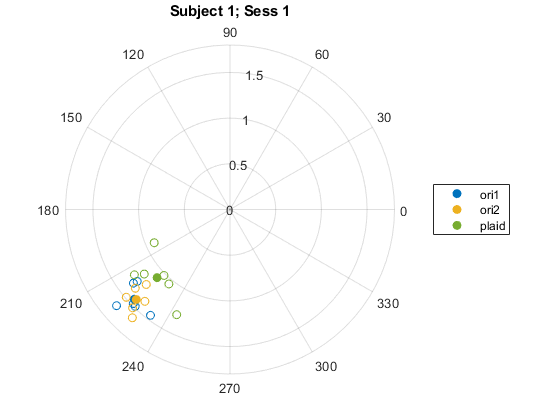

In [4]:
% Plot single subjects
plotSubj(dataP,1,1);
% for subjInd = 1:6
%     plotSubj(dataP,subjInd,1);
%     plotSubj(dataP,subjInd,2);
% end


In [5]:
% Get session means in cartesian space
sessMeans = getSessMeans(dataP);
size(sessMeans) % cond[ori1 ori2 plaid ori] x subj x sess

% Get subject means in cartesian space then move to polar space
subjMeans = mean(sessMeans,3);
size(subjMeans) % cond[ori1 ori2 plaid ori] x subj


ans =

     4     6     2


ans =

     4     6




In [6]:
% Move to polar space
subjMeans_theta = angle(subjMeans);
subjMeans_rho = abs(subjMeans);

In [7]:
% Compare amplitudes
condIndA = 4; % 1; 2; [1 2];
condIndB = 3;
disp('Amplitude')
[H,P,CI,STATS] = ttest(mean(subjMeans_rho(condIndA,:),1),mean(subjMeans_rho(3,:),1));
disp(['t=' num2str(STATS.tstat) '; p=' num2str(P)])
[P,H,STATS] = signrank(mean(subjMeans_rho(condIndA,:),1),mean(subjMeans_rho(3,:),1));
disp(['rank=' num2str(STATS.signedrank) '; p=' num2str(P)])

% Compare delays
disp([newline 'Delay'])
[H,P,CI,STATS] = ttest(mean(subjMeans_theta(condIndA,:),1),mean(subjMeans_theta(3,:),1));
disp(['t=' num2str(STATS.tstat) '; p=' num2str(P)])
[P,H,STATS] = signrank(mean(subjMeans_theta(condIndA,:),1),mean(subjMeans_theta(3,:),1));
disp(['rank=' num2str(STATS.signedrank) '; p=' num2str(P)])
[P,F] = circ_htest(mean(subjMeans_theta(condIndA,:),1),mean(subjMeans_theta(3,:),1));
disp(['F=' num2str(F) '; p=' num2str(P)])

Amplitude
t=0.97521; p=0.37425
rank=15; p=0.4375

Delay
t=2.9738; p=0.031022
rank=20; p=0.0625
F=4.1832; p=0.10463

